In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
pio.templates
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [22]:
#importing and checking data
dataset = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print(dataset.head())
print("\n")
print(dataset.info())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [23]:
dataset.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset["Frequency"] = dataset["Frequency"].astype("category")
dataset["Month"] = dataset["Date"].dt.month
dataset["Month_int"] = dataset["Month"].apply(lambda x : int(x))
dataset["Month_Name"] = dataset["Month_int"].apply(lambda x : calendar.month_abbr[x])
dataset["Region"] = dataset["Region"].astype("category")
dataset.drop(columns="Month", inplace=True)
dataset.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [24]:
dataset_stat = dataset[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(dataset_stat.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [25]:
region_stats = dataset.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

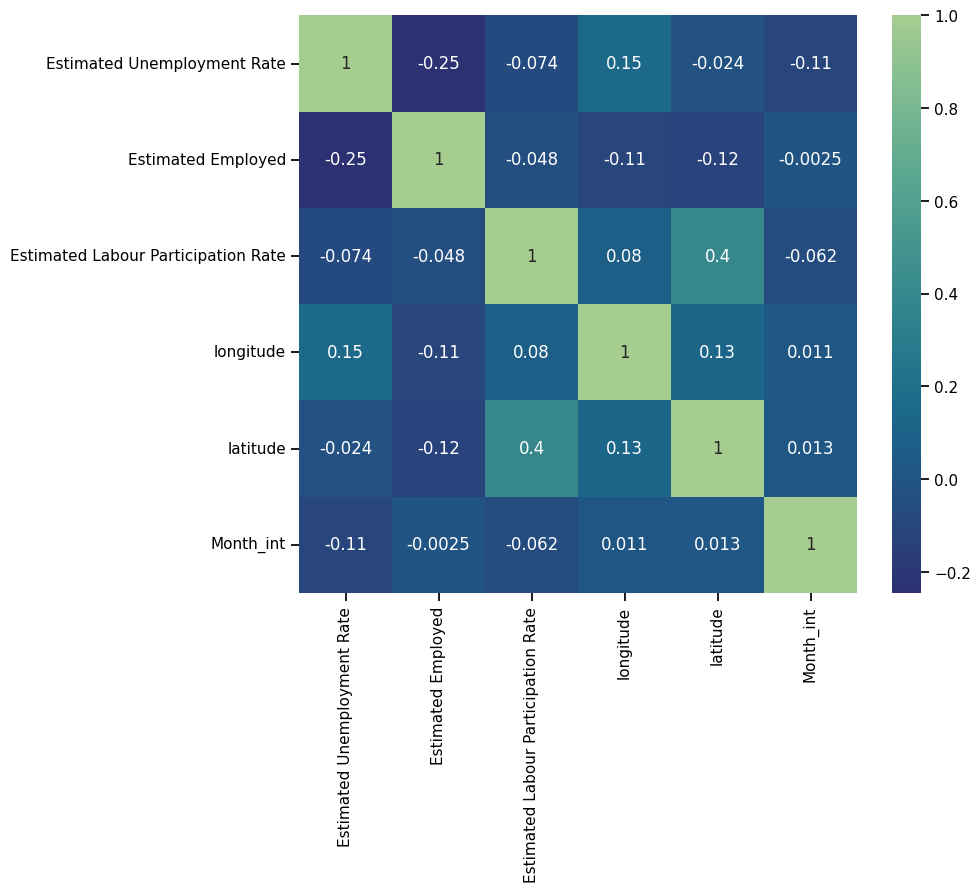

In [26]:
heat_map = dataset[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','longitude','latitude','Month_int']]
heat_map = heat_map.corr()

plt.figure(figsize=(9,7.5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_map, annot=True, cmap='crest_r')

In [27]:
fig1 = px.box(dataset, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment Rate', template='plotly_dark')
fig1.update_layout(xaxis={'categoryorder':'total descending'})

In [28]:
fig2 = px.scatter_matrix(dataset, template='plotly_dark', dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], color='Region')
fig2.show()

In [29]:
plot_unemp = dataset[['Estimated Unemployment Rate', 'States']]
dataset_enemp = plot_unemp.groupby('States').mean().reset_index()
dataset_enemp = dataset_enemp.sort_values('Estimated Unemployment Rate')
fig3 = px.bar(dataset_enemp, x='States', y='Estimated Unemployment Rate', color='States', title='Average Unemployment in States', template='plotly_dark')
fig3.show()

In [30]:
fig4 = px.bar(dataset, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_Name', color='States', title='Unemployment Rate by Region between Jan to Oct 2020', height=900, width=900, template='plotly_dark')
fig4.update_layout(xaxis={'categoryorder':'total descending'})
fig4.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=3000
fig4.show()

In [34]:
dataset['EUR_dis']=dataset['Estimated Unemployment Rate']**0.85
fig5 = px.scatter_geo(dataset, 'longitude', 'latitude', color='Region', hover_name='States', size='EUR_dis', animation_frame='Month_Name', scope='asia',height=700, width=700, template='simple_white', title="Impact of Lockdown on Unemployment Rates: Map Visual")
fig5.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000
fig5.update_geos(lataxis_range=[8,37], lonaxis_range=[67,99], oceancolor='#4f42b5', showocean=True)
fig5.update_traces(text = dataset['Estimated Unemployment Rate'])
fig5.show()

In [32]:
lockdown = dataset[(dataset['Month_int']>=4)&(dataset['Month_int']<=7)]
bef_lockdown = dataset[(dataset['Month_int']>=1)&(dataset['Month_int']<=4)]
g_lockdown = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bef_lockdown = bef_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lockdown['Unemployment Rate before lockdown'] = g_bef_lockdown['Estimated Unemployment Rate']
g_lockdown.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']


In [41]:
g_lockdown['Percentage change in Unemployment']=round((g_lockdown['Unemployment Rate after lockdown']-g_lockdown['Unemployment Rate before lockdown'])*100/g_lockdown['Unemployment Rate before lockdown'],2)
fig6 = px.bar(g_lockdown.sort_values('Percentage change in Unemployment'), x ='States', y='Percentage change in Unemployment', color='Percentage change in Unemployment', title='Percentage change in Unemployment after lockdown by states', template='plotly_dark', height=800)
fig6.show()
print(g_lockdown)

              States  Unemployment Rate after lockdown  \
0     Andhra Pradesh                         12.397500   
1              Assam                          6.245000   
2              Bihar                         30.802500   
3       Chhattisgarh                          9.602500   
4              Delhi                         24.360000   
5                Goa                         15.397500   
6            Gujarat                          8.965000   
7            Haryana                         30.780000   
8   Himachal Pradesh                         16.732500   
9    Jammu & Kashmir                         15.846667   
10         Jharkhand                         33.725000   
11         Karnataka                         15.565000   
12            Kerala                         12.917500   
13    Madhya Pradesh                         11.475000   
14       Maharashtra                         12.370000   
15         Meghalaya                          4.800000   
16            

In [36]:
def impacted(x):
    if x<=0:
        return ('Minimal to No Impact')
    if x<=30:
        return ('Moderately Impacted')
    if x<=50:
        return ('Highly Impacted')
    if x<=90:
        return ('Severly Impacted')
    if x>90:
        return ('Extremely Impacted')

In [42]:
g_lockdown['Impact Status'] = g_lockdown.sort_values('Percentage change in Unemployment').apply(lambda x:impacted(float(x)))
fig7 = px.bar(g_lockdown['Impact Status'], y='States',x='Percentage change in Unemployment',color='Impact Status', title='Impact of lockdown on Employment across states',template='plotly_dark',height=800)
fig7.show()

TypeError: cannot convert the series to <class 'float'>